<a href="https://colab.research.google.com/github/DangMinh21/CS114.L22.KHCL/blob/main/Do_an_cuoi_ki/featureExtractionFlatten.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
# Import library
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


In [3]:
# lấy địa chỉ ảnh và label tương ướng của dữ liệu được lưu trên drive
FJoin = os.path.join
def getLinkImg(path):
    linkImgs = []
    labels = []
    # duyệt từng folder, mỗi folder chứa 1 chữ
    characterFolders = [FJoin(path, f) for f in os.listdir(path)]
    for folder in characterFolders:
        # duyệt qua mọi chữ trong folder
        label = folder.split('/')[-1]
        label = int(label)
        imgs = [FJoin(folder, img) for img in os.listdir(folder)]
        for img in imgs:
            linkImgs.append(img)
            labels.append(label)
    return linkImgs, labels

In [4]:
# load data
train_path = '/content/drive/MyDrive/Colab Notebooks/dataML/TrainData'
test_path = '/content/drive/MyDrive/Colab Notebooks/dataML/TestData'
x_train, y_train = getLinkImg(train_path)
x_test, y_test = getLinkImg(test_path)
print(f'size train: {len(x_train)}')
print(f'size test: {len(x_test)}')

size train: 26279
size test: 8760


In [5]:
label_dict = dict()
labels = []
with open('/content/drive/MyDrive/Colab Notebooks/dataML/KiTu_So.txt', 'r') as f:
  lines = f.readlines()
for line in lines:
  l = line.split()
  label_dict[int(l[0])] = l[1]
  labels.append(l[1])
print('label tương ứng: ')
print(label_dict)
print(labels)

label tương ứng: 
{1: 'a', 2: 'á', 3: 'à', 4: 'ả', 5: 'ạ', 6: 'ã', 7: 'ă', 8: 'ắ', 9: 'ằ', 10: 'ẳ', 11: 'ặ', 12: 'ẵ', 13: 'â', 14: 'ấ', 15: 'ầ', 16: 'ẩ', 17: 'ậ', 18: 'ẫ', 19: 'b', 20: 'c', 21: 'd', 22: 'đ', 23: 'e', 24: 'é', 25: 'è', 26: 'ẻ', 27: 'ẹ', 28: 'ẽ', 29: 'ê', 30: 'ế', 31: 'ề', 32: 'ể', 33: 'ệ', 34: 'ễ', 35: 'g', 36: 'h', 37: 'i', 38: 'í', 39: 'ì', 40: 'ỉ', 41: 'ị', 42: 'ĩ', 43: 'k', 44: 'l', 45: 'm', 46: 'n', 47: 'o', 48: 'ó', 49: 'ò', 50: 'ỏ', 51: 'ọ', 52: 'õ', 53: 'ô', 54: 'ố', 55: 'ồ', 56: 'ổ', 57: 'ộ', 58: 'ỗ', 59: 'ơ', 60: 'ớ', 61: 'ờ', 62: 'ở', 63: 'ợ', 64: 'ỡ', 65: 'p', 66: 'q', 67: 'r', 68: 's', 69: 't', 70: 'u', 71: 'ú', 72: 'ù', 73: 'ủ', 74: 'ụ', 75: 'ũ', 76: 'ư', 77: 'ứ', 78: 'ừ', 79: 'ử', 80: 'ự', 81: 'ữ', 82: 'v', 83: 'x', 84: 'y', 85: 'ý', 86: 'ỳ', 87: 'ỹ', 88: 'ỷ', 89: 'ỵ'}
['a', 'á', 'à', 'ả', 'ạ', 'ã', 'ă', 'ắ', 'ằ', 'ẳ', 'ặ', 'ẵ', 'â', 'ấ', 'ầ', 'ẩ', 'ậ', 'ẫ', 'b', 'c', 'd', 'đ', 'e', 'é', 'è', 'ẻ', 'ẹ', 'ẽ', 'ê', 'ế', 'ề', 'ể', 'ệ', 'ễ', 'g', 'h', 'i', 'í'

size: (16, 16)
mode: L


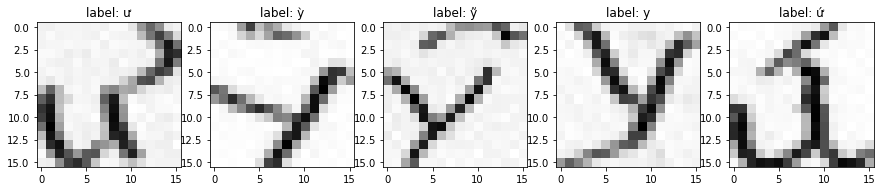

In [6]:
# show một vài bức ảnh trong tập train
imgs = [1, 500, 1000, 5000, 8000]
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15, 3))
for ax, img in zip(axes, imgs):
    im = Image.open(x_train[img])
    ax.imshow(im, cmap='gray')
    ax.set_title('label: {}'.format(label_dict[int(y_train[img])]))
  
img = Image.open(x_train[0])
print(f'size: {img.size}\nmode: {img.mode}')

In [10]:
im = Image.open(x_train[0])
print(255-np.array(im))

[[  2   0   0   1   0   1   2   1   0   5   0   1  72 228 153  17]
 [  0   0   3   0   2   0   1   1   6   0   3   4   7  63 189 140]
 [  0   1   2   0   0   4   0   6   6   2   3   1   6   9  68 214]
 [  1   2   0   2   1   6   7   3   9  10   3   0   7   3 116 207]
 [  3   2   0   1   1   0   3  17 105  85   5   0   4  41 203 142]
 [  0   0   1   2   6   9   2 118 239 112   0   6  20 183 169  14]
 [  1   1   1   0   0   7  21 206 225  37  10   5 100 237  70   7]
 [  1   0   1   4   4   7  85 244 159   6   3   9 183 194  17   4]
 [  2   0   1   3   5   7 134 236  66   6   6  26 224 102  10   4]
 [  3   1   3   3   4  37 226 173   5   4   6  75 218  30   2   3]
 [  0   6   2   2  28 169 244 108   6   9   9 161 162   4   2   5]
 [  3   2   7  36 163 133 196  32  12   4  64 197 110   9   3   4]
 [  3  10  57 191 199 101 188  25   2  32 183 156 108   5  11  67]
 [138 173 214 164  19 114 228  22  36 172 130 204  90  30  91 138]
 [ 83 151 121  15   5  48 230 124 200 168  42 223 195 201 164 

In [16]:
def flattenData(imgs, label):
  flatten_datas = []
  for i in range(len(imgs)):
    img = Image.open(imgs[i])
    img = 255-np.array(img)
    imgFlat = np.ravel(img)
    data = np.append(imgFlat, label[i])
    flatten_datas.append(data)
  return np.array(flatten_datas)

In [ ]:
train_data_flat = flattenData(x_train, y_train)
test_data_flat = flattenData(x_test, y_test)

In [20]:
print(f'Train size: {train_data_flat.shape}')
print(f'Test size: {test_data_flat.shape}')

Train size: (26279, 257)
Test size: (8760, 257)


In [18]:
headers = list(map(str, range(256)))
headers.append('label')

In [19]:
# convert file csv to store
pd.DataFrame(train_data_flat).to_csv('/content/drive/MyDrive/Colab Notebooks/dataML/Data_Flatten/train_data_flat.csv', header=headers, index=False)
pd.DataFrame(test_data_flat).to_csv('/content/drive/MyDrive/Colab Notebooks/dataML/Data_Flatten/test_data_flat.csv', header=headers, index=False)